# **به نام پروردگار هدایت کننده به راه راست**





# **Big Data Project**

## -amir-ali goli



> HW7 




[**GitHub** link](https://github.com/amirali079/Clustering-And-Kafka) : https://github.com/amirali079/Clustering-And-Kafka







## read file from drive


> با استفاده از کتابخانه‌های گوگل، فایل داده‌ها که در درایو هست را دانلود می‌کنیم



In [ ]:
from google.colab import files
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

dataset_id = '16AYpQQfr-WYSC7Mg7w1FA_6cKRs1o2cX'

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

downloaded = drive.CreateFile({'id':dataset_id}) 
downloaded.GetContentFile('uber.csv')  



## install spark


> در این مرحله اسپارک را نصب می‌کنیم



In [ ]:
!pip install pyspark

from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=36729434e49cdd68aea9e119a1c8af23b50126d98300c0900ff09663274c4660
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


## read data frame and show


>  فایل لود شده در برنامه را با استفاده از کتابخانه‌های اسپارک درون دیتافریم می‌ریزیم

> سپس نمایش می‌دهیم همچنین در مرحله بعدی جزییات داده‌ها مثل نوع ستون‌های دریافتی را نیز گزارش می‌دهیم




In [ ]:
df = spark.read.csv("uber.csv", header=True, inferSchema=True)
df.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.9516|B02512|
|8/1/2014 0:30:00|40.7433| -73.986|B02512|
|8/1/2014 0:34:00|40.7437|-73.9884|B02512|
|8/1/2014 0:36:00|40.7406|-74.0077|B02512|
+----------

In [ ]:
df.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)



## check for null values


```
با استفاده از دستور زیر  تعداد میسینگ ولیوهای هر ستون را پیدا میکنیم
```


```
همانطور که در پاسخ مشاهده می‌شود هیچکدام از ستون‌ها مقدار نال و میسنگ ولیو ندارند
```


In [ ]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---+---+----+
|Date/Time|Lat|Lon|Base|
+---------+---+---+----+
|        0|  0|  0|   0|
+---------+---+---+----+



## Cast categorical columns to numeric


```
ستون‌ ‌Base را به عددی تبدیل کرده تا بتوانیم کوریلیشن ها را حساب کنیم
```



In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Base", outputCol="Base_index")
df = indexer.fit(df).transform(df)
    
df.show()

+----------------+-------+--------+------+----------+
|       Date/Time|    Lat|     Lon|  Base|Base_index|
+----------------+-------+--------+------+----------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|       4.0|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|       4.0|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|       4.0|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|       4.0|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|       4.0|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|       4.0|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|       4.0|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|       4.0|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|       4.0|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|       4.0|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|       4.0|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|       4.0|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|       4.0|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|       4.0|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|       4.0|
|8/1/2014 0:29:00|40.7364|-7

قسمت تایم را نیز از تاریخ جدا میکنیم

In [ ]:
from pyspark.sql.functions import split, col
from pyspark.sql.functions import to_date
from pyspark.sql.functions import to_timestamp

df = df.withColumn("Date", split(col("Date/Time"), " ")[0]) \
       .withColumn("Time", split(col("Date/Time"), " ")[1])




df.show()
df.printSchema()



+----------------+-------+--------+------+----------+--------+-------+
|       Date/Time|    Lat|     Lon|  Base|Base_index|    Date|   Time|
+----------------+-------+--------+------+----------+--------+-------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|       4.0|8/1/2014|0:03:00|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|       4.0|8/1/2014|0:09:00|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|       4.0|8/1/2014|0:12:00|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|       4.0|8/1/2014|0:12:00|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|       4.0|8/1/2014|0:12:00|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|       4.0|8/1/2014|0:13:00|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|       4.0|8/1/2014|0:15:00|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|       4.0|8/1/2014|0:17:00|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|       4.0|8/1/2014|0:19:00|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|       4.0|8/1/2014|0:20:00|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|       4.0|8/1/2014|0:21:00|
|8/1/2

## visualiztion with chart



```
با استفاده از تبدیل دیتافریم اسپارک به دیتافریم پانداز، بصری سازی داده‌ها را انجام می‌دهیم ابتدا نمودار هیستوگرام ستون‌ها را رسم کرده، 
```





<ipython-input-8-54fa458af3c8>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.toPandas().hist(ax = ax1);


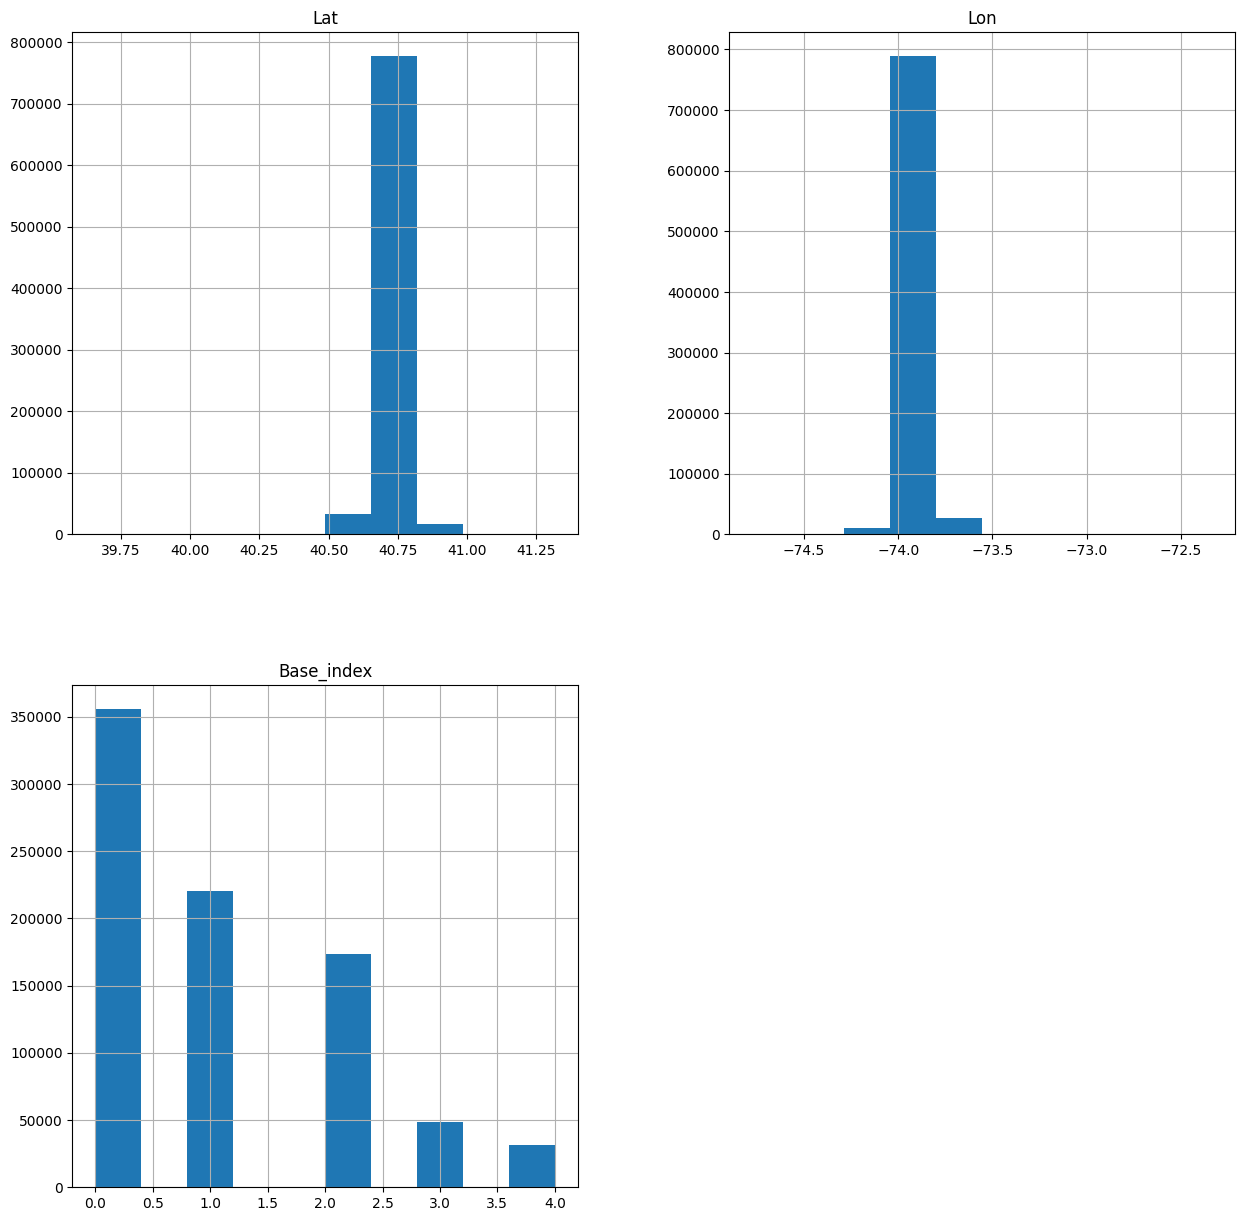

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 15))
df.toPandas().hist(ax = ax1);

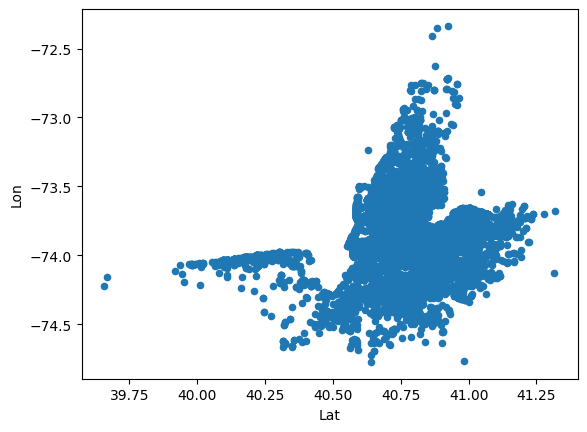

In [ ]:
df.toPandas().plot.scatter(x='Lat', y='Lon')
plt.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


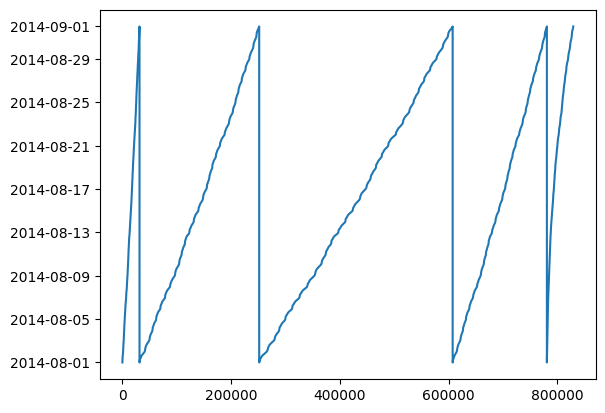

In [ ]:
from pyspark.sql.functions import to_timestamp
df = df.withColumn("timestamp", to_timestamp("Date/Time", "M/d/yyyy H:mm:ss"))

pandas_df = df.select('timestamp').toPandas()
+
plt.plot(pandas_df['timestamp'])
plt.show()

In [ ]:
selected_cols=['Lat','Lon','Base_index']

corr_matrix = df.select(selected_cols).toPandas().corr()

corr_matrix

,Lat,Lon,Base_index
Lat,1.000000,0.029859,0.006495
Lon,0.029859,1.000000,-0.000642
Base_index,0.006495,-0.000642,1.000000


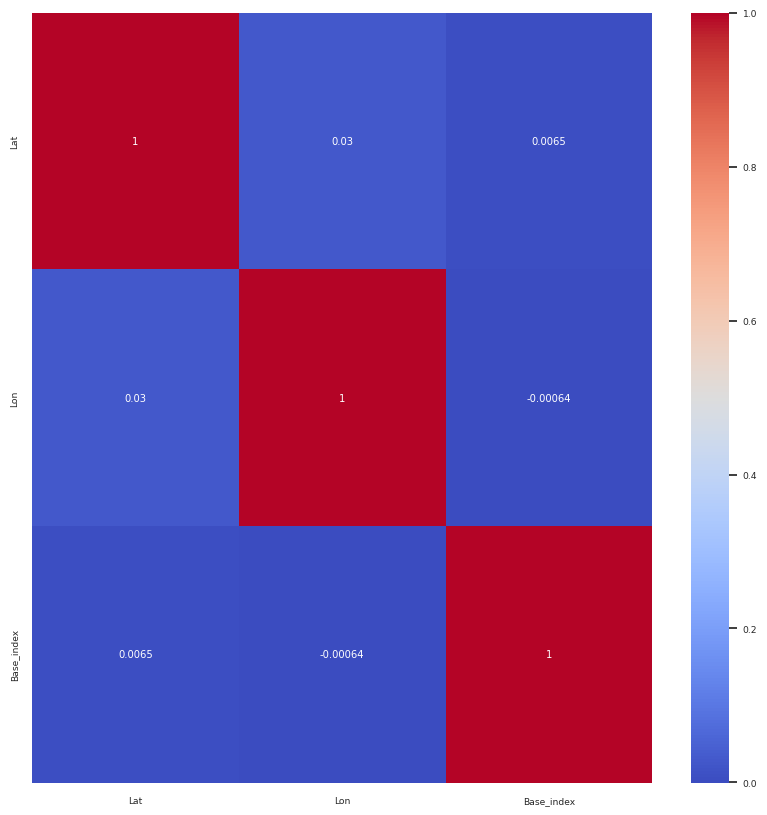

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

## feature selection and find best cluster count



```
با توجه به چهار ویژگی و تحلیل بصری آن ها تاریخ ها حالت سینوسی داشته و مناسب نیست و بیس نیز کوریلیشنی با دو متغیر لت و لانگ ندارد 
```


```
پس همان دو ستون لت و لانگ را انتخاب میکنیم
```



```
با توجه به نمودار البو رسم شده، تعداد مناسب کلاسترها عدد ۴ است
```



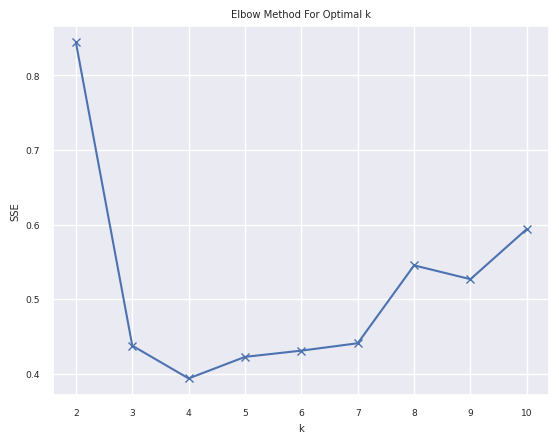

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

assembler = VectorAssembler(inputCols=['Lat', 'Lon'], outputCol='features')
data = assembler.transform(df)

k_values = range(2, 11)

sse = []
for k in k_values:
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(data)
    predictions = model.transform(data)
    evaluator = ClusteringEvaluator() 
    cost = evaluator.evaluate(predictions)
    sse.append(cost)

plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# run algorithm and save model


```
 مدل را آموزش داده برای این کار 80 درصد داده‌ها را برای آموزش انتخاب کرده و 20 درصد آن را نز برای تست می‌گذاریم
```



In [ ]:
from pyspark.ml.clustering import KMeansModel
import pickle

train, test = data.randomSplit([0.8, 0.2], seed=12345)

kmeans = KMeans(k=4, seed=1)
model = kmeans.fit(train)



 ## Save Model

In [ ]:
model.save("kmeans_model2.pkl")

In [ ]:
test = test.drop("timestamp","features","Time","Base_index","Date")
test

DataFrame[Date/Time: string, Lat: double, Lon: double, Base: string]

## save test set

In [ ]:
test = test.coalesce(1)
test.write.csv("test.csv", header=True)

# **Kafka Phase**

In [ ]:
!pip install --force-reinstall pyspark==2.4.6
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.4/218.4 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 20.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814403 sha256=574269f944ed18e8cdf59b4b9b619cd1b5f0e21d0ac504e97b91188c1a5f2110
  Stored in directory: /root/.cache/pip/wheels/bc/36/e4/e7e22627870b56ace9633c65dbeff2299c9b5cc529c308afe6
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.4.0
    Uninstalling pyspark-3.4.0:
      Successfully uninstalled pyspark-3.4.0


In [ ]:
!--packages org.apache.spark:spark-streaming-kafka-0-10_2.11:2.2.0

In [ ]:
schema = StructType([
    StructField('Date/time', StringType()),
    StructField('Lat', DoubleType()),
    StructField('Lon', DoubleType()),
    StructField('Base', StringType())
])


kafkaParams = {
    'bootstrap.servers': 'localhost:9092',
    'value.deserializer': lambda x: x.decode('utf-8')
}

topic = 'test_topic'

ssc = StreamingContext(spark.sparkContext, 5)



/usr/local/lib/python3.10/dist-packages/pyspark/streaming/context.py:72: FutureWarning: DStream is deprecated as of Spark 3.4.0. Migrate to Structured Streaming.
  


In [49]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'])
for index, row in test.iterrows():
    producer.send('uber_test_topic', json.dumps(row.asDict()))


ssc = StreamingContext(spark.sparkContext, batchDuration=10)
kafkaParams = {"metadata.broker.list": "localhost:9092", "auto.offset.reset": "smallest"}
raw_kafka_stream = KafkaUtils.createDirectStream(ssc, topics=["uber_test_topic"], kafkaParams=kafkaParams)

loaded_model = KMeansModel.load("kmeans_model2.pkl")

processed_kafka_stream = raw_kafka_stream.map(lambda x: json.loads(x[1]))
clustered_stream = loaded_model.transform(processed_kafka_stream)

ssc.start()
ssc.awaitTermination()

## producer

In [ ]:
from kafka import KafkaProducer
import csv
import time

producer = KafkaProducer(bootstrap_servers='localhost:9092')

with open('test.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        message = ','.join(row)
        print(f"message -> {message.encode('utf-8')}")
        producer.send('uber_test_topic', message.encode('utf-8'))
        time.sleep(50)


## consumer

In [ ]:
import time
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.ml.evaluation import ClusteringEvaluator
import pandas as pd
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import SparkSession
from collections import namedtuple
from kafka import KafkaConsumer
import json
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeansModel
from pyspark.sql.functions import col

spark = SparkSession.builder.getOrCreate()
consumer = KafkaConsumer('uber_test_topic',bootstrap_servers='localhost:9092')

consumer.subscribe('uber_test_topic')

loaded_model = KMeansModel.load("kmeans_model2.pkl")

for message in consumer:
    test = [];
    decoded_string = message.value.decode('utf-8')
    split_string = decoded_string.split(',')
    test = spark.createDataFrame([split_string])
    test = test.withColumn("c1", col("_2").cast("double"))
    test = test.withColumn("c2", col("_3").cast("double"))
    assembler = VectorAssembler(inputCols =["c1", "c2"], outputCol='features')
    output = assembler.transform(test)
    predictions = loaded_model.transform(output)
    predictions.show()